In [1]:
import numpy as np
from scipy import io
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
Tamb = 25.3 + 273.15 # K
Pamb = 98.5 # kPa
c0 = 20.047 * Tamb**0.5
rho = 1.290 * Pamb / 101.325 * 273.15 / Tamb


In [16]:
#Anechoic termination condition 45 mm mic separation:

YM2coarse_anech45_1234 = io.loadmat('YM2_coarse_d1_s1_anec_1V_1234.mat')
YM2coarse_anech45_2134 = io.loadmat('YM2_coarse_d1_s1_anec_1V_2134.mat')    
YM2coarse_anech45_3214 = io.loadmat('YM2_coarse_d1_s1_anec_1V_3214.mat') 
YM2coarse_anech45_4231 = io.loadmat('YM2_coarse_d1_s1_anec_1V_4231.mat')

freq = YM2coarse_anech45_1234['FFT1_H1_2_1_X_Val'].flatten()

H12d = YM2coarse_anech45_1234['FFT1_H1_2_1_Y_ReIm'].flatten()
H13d = YM2coarse_anech45_1234['FFT1_H1_3_1_Y_ReIm'].flatten()
H14d = YM2coarse_anech45_1234['FFT1_H1_4_1_Y_ReIm'].flatten()

H12i = YM2coarse_anech45_2134['FFT1_H1_2_1_Y_ReIm'].flatten()
H13i = YM2coarse_anech45_3214['FFT1_H1_2_1_Y_ReIm'].flatten()
H14i = YM2coarse_anech45_4231['FFT1_H1_2_1_Y_ReIm'].flatten()



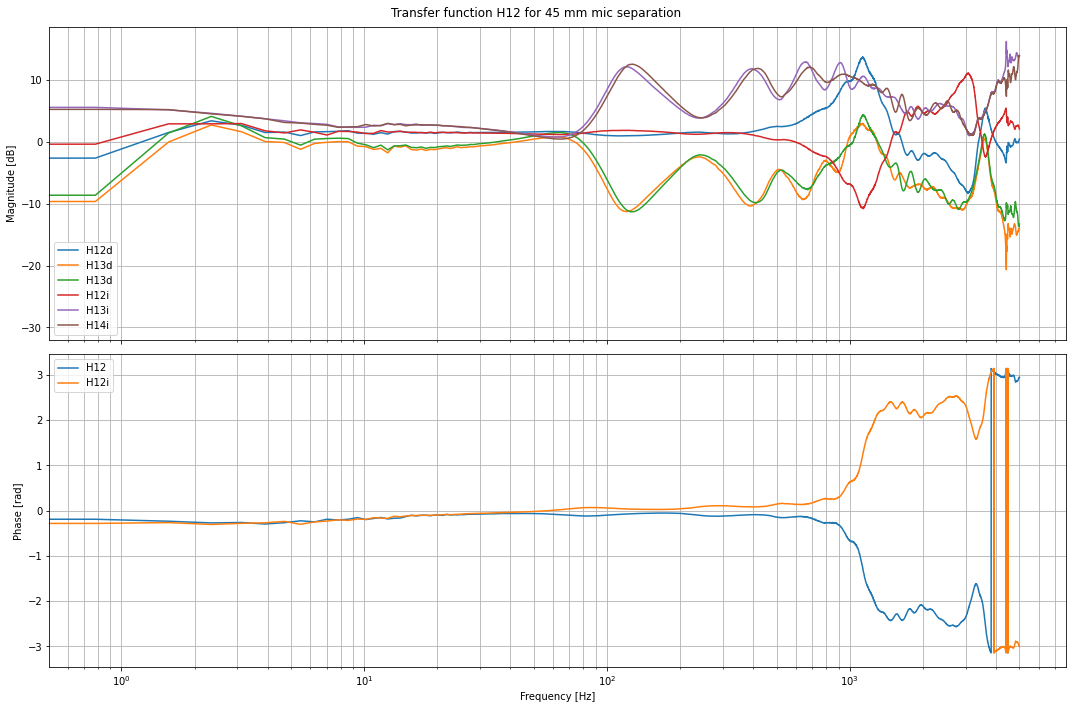

In [24]:
fig, ax = plt.subplots(2,1, figsize=(15, 10) ,sharex=True)
ax[0].semilogx(freq, 20*np.log10(np.abs(H12d)),label='H12d')
ax[0].semilogx(freq, 20*np.log10(np.abs(H13d)),label='H13d')
ax[0].semilogx(freq, 20*np.log10(np.abs(H14d)),label='H13d')
ax[0].semilogx(freq, 20*np.log10(np.abs(H12i)),label='H12i')
ax[0].semilogx(freq, 20*np.log10(np.abs(H13i)),label='H13i')
ax[0].semilogx(freq, 20*np.log10(np.abs(H14i)),label='H14i')
ax[0].legend()
ax[0].grid(which='both')
ax[0].set_ylabel('Magnitude [dB]')
ax[1].semilogx(freq, np.angle(H12d), label='H12')
ax[1].semilogx(freq, np.angle(H12i), label='H12i')
ax[1].legend()
ax[1].grid(which='both')
ax[1].set_ylabel('Phase [rad]')
ax[1].set_xlabel('Frequency [Hz]')
fig.suptitle('Transfer function H12 for 45 mm mic separation')
plt.tight_layout()

In [25]:
Hc12 = (H12d + H12i)**0.5
Hc13 = (H13d + H13i)**0.5 
Hc14 = (H14d + H14i)**0.5  